<a href="https://colab.research.google.com/github/nyw-pathfinder/Deep-Learning-Bootcamp-with-PyTorch/blob/master/05_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Contents

- [Convolutions Filters](#convolutions)
- [Exercises](#exercises)

# Housekeeping

- Some references for today
  - [Official pytorch tutorials](https://pytorch.org/tutorials/)
  - [Pytorch tutorials by yunjey, from beginning to advanced](https://github.com/yunjey/pytorch-tutorial)
  - [Deep Learning Book on ConvNets](https://www.deeplearningbook.org/contents/convnets.html)
  - [MIT Intro to Deep Learning Lecture on ConvNets](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3)
- Today's url 
  - https://git.io/ml2021-05
- Email if you need help with any of this!

# What do we want a neural network to do?

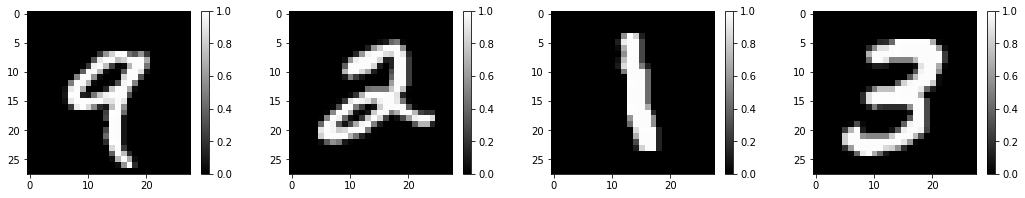

In [ ]:
from IPython.display import Image
Image("mnist_digits_examples.png")

- Consider a handwritten digit dataset, that is, data consists of images of numbers that people have written, with the goal to make a classifier for the digits
- Thinking of this dataset and a 2 layer hidden
  network, we might expect/want the network to piece together a
  structure like this
  - Every pixel is a number that gets passed to each node of the next layer
  - In the first layer, we might find loops and lines in the various parts of the image
  - In the second layer, see if they combine together (fire at the
    same time), in certain combinations
- In the example, theres a "loop" a the top connected to a "line" for
  9, a similar "loop" at the bottom but connect to a "hook", a "line"
  similar to that in 9 for the 1, and some "hooks" for the 3
- Is the network structured this way? I.e. are there "loop", "hook",
  "line" finders

Idea from [3blue1brown on neural nets](https://www.youtube.com/watch?v=aircAruvnKk)

# What does it really do?

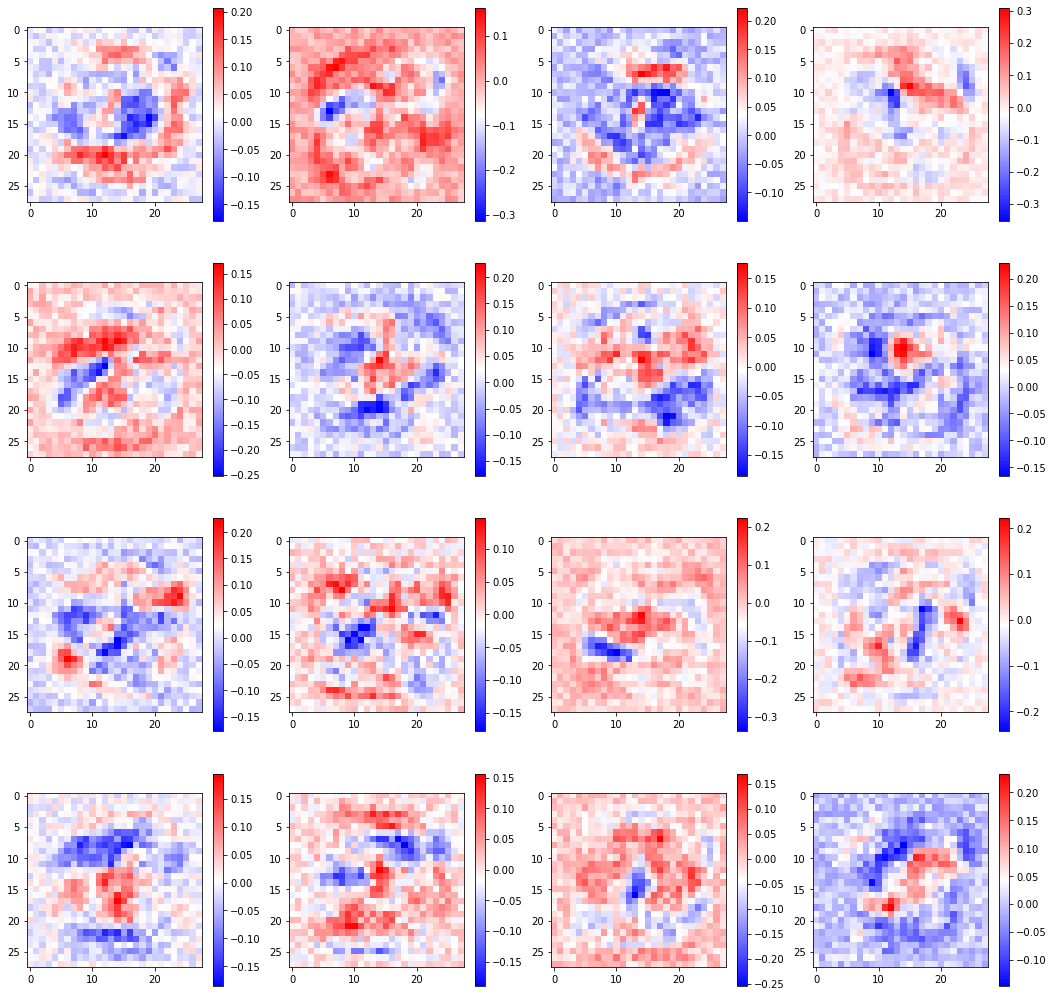

In [ ]:
Image("filter_weights_mnist.png")

- Plot of the weights from each pixel connection in the first layer of
  a 2 hidden layer model from MNIST (red means this pixel should be
  fired to fire this node, blue means that if the pixel is fired the
  node is suppressed)
- Maybe recognizable structures, but lots of fairly random swirls
- One issue with the network is that structures like loops and lines
  need to be fit, <font color="red">but these can appear in different places on the image</font>
- So, we don't have a "loop finder" node, <font color="red">we need to find loops in any
  of many different points on the image</font>, leading to a jumble of weights
- Can we change our network so "loop finder" structures are possible?

# Convolutional Layers <a id="convolutions" />

- A convolution layer is a connection between one layer and the next
  in a NN with a very specific structure:
  - Typically, it works with a 3d input like an image: channels (red,
    green, blue), width, height
  - It contains a *kernel* or *filter*, which is a 3d block sized
    $channel \times n \times m$, $n$ and $m$ are user-specifed, with
    each element of the block a weight to be set in training
  - The outputs consists of all $n \times m$ /convolutions/ of the
    filter with the image, creating a new one-channel image
    - Discrete convolution, meaning each element of the kernel is
      multiplied with a pixel in (one channel of) the image, and all
      are summed together
  - The output of the filter is passed through an activation function,
    the same as the usual fully-connected layer
- A single convolutional layer generally <font color="red">consists of many
  convolutional filters, each filter giving one layer in the output</font>
- Networks with convolutional layers are Convolutional Neural
  Networks: CNN

# Convolutional Filters In Pictures

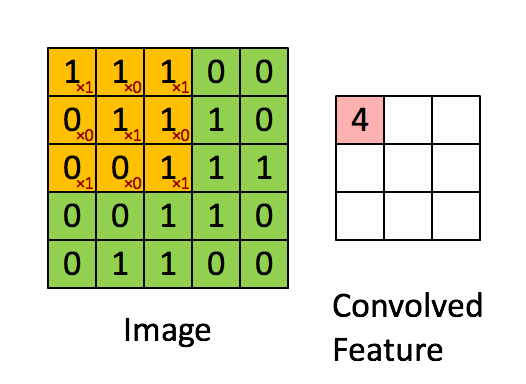

In [ ]:
Image("conv_schem-0.png")

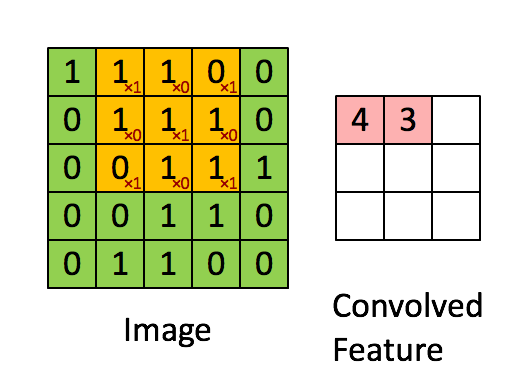

In [ ]:
Image("conv_schem-1.png")

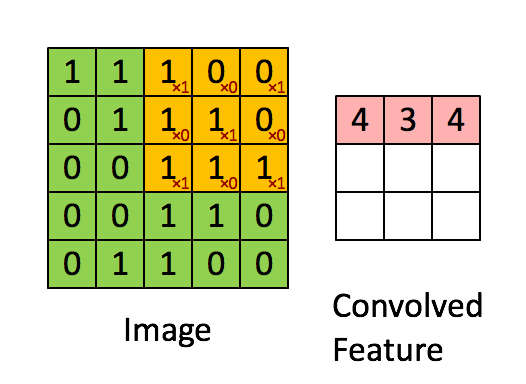

In [ ]:
Image("conv_schem-2.png")

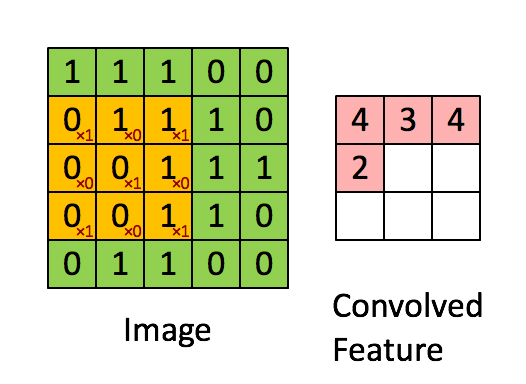

In [ ]:
Image("conv_schem-3.png")

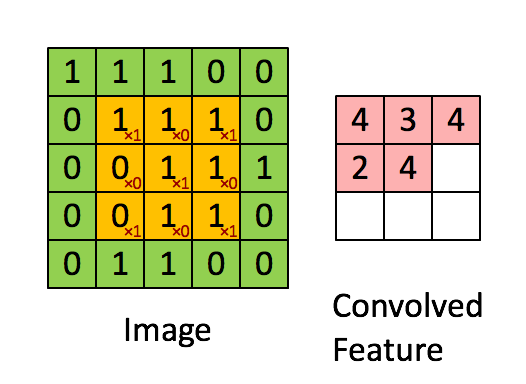

In [ ]:
Image("conv_schem-4.png")

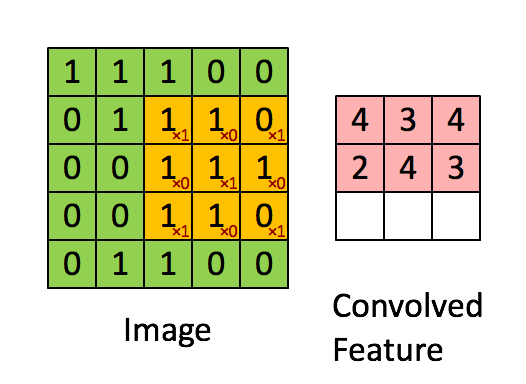

In [ ]:
Image("conv_schem-5.png")

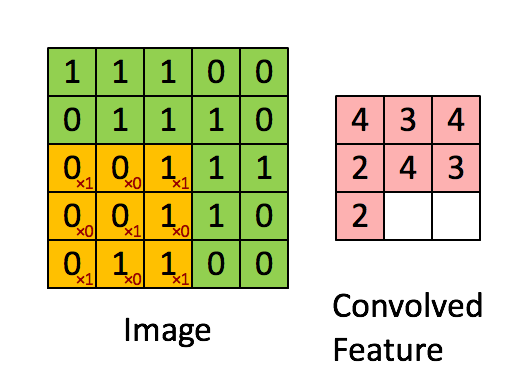

In [ ]:
Image("conv_schem-6.png")

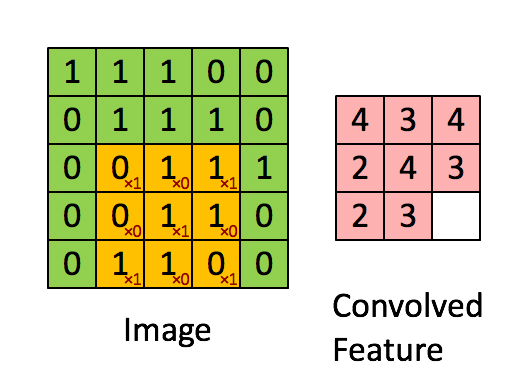

In [ ]:
Image("conv_schem-7.png")

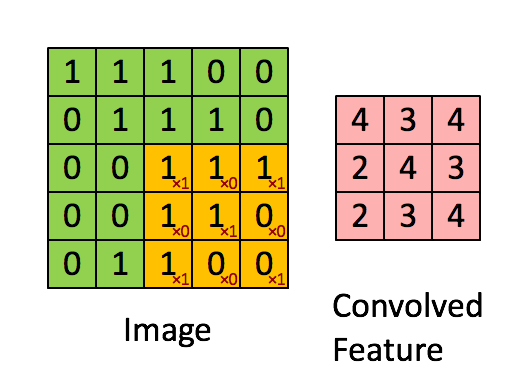

In [ ]:
Image("conv_schem-8.png")

- A <font color="olive">filter</font> sliding over the <font color="green">image</font> builds up the <font color="red">output layer</font>, each
  output is sum of filter elements multiplied by image pixels
- The same filter is used for each pixel, the weights are learnt
  during training (as well as an output bias)

# Example Filter

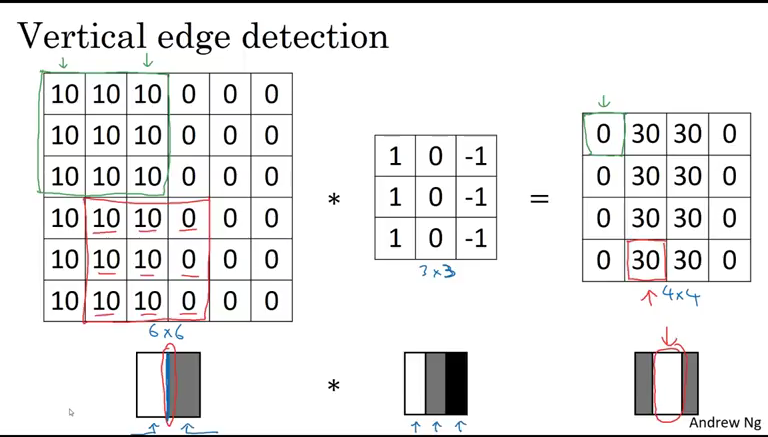

In [ ]:
Image("edge_detection.png")

- As an example, here is a 3x3 filter for detecting vertical edges
- The opposing plus and minus sides cancel in a <font color="green">block of color</font>
- <font color="red">At an edge</font>, the filter is either highly positive (white to left of
  edge), or negative (white to right of edge)
- What would a horizontal edge detector look like?

Andrew Ng lecture by way of https://kharshit.github.io/blog/2018/12/14/filters-in-convolutional-neural-networks

# Multiple Filter Outputs

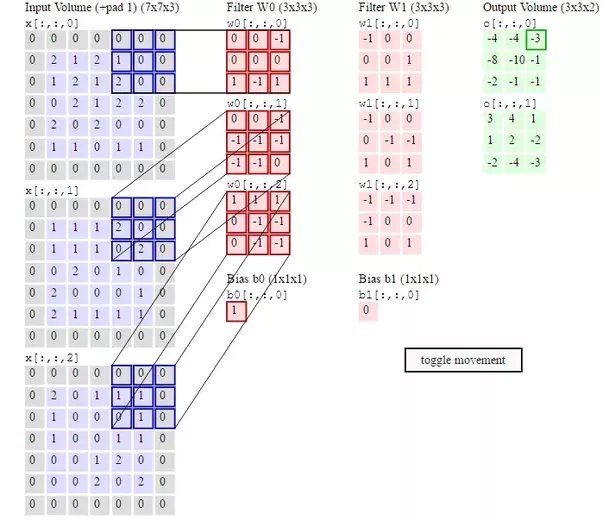

In [ ]:
Image("multiple_layers.png")

- When multiple filters are used in a single layer, they have the same
  width and height, so they can be put together in a single output as
  $channels \times width \times height$
- This is exactly the image structure which was the input to the
  network
- This means this convolutional structure can be used several times in
  series
  - Each successive layer effectively sees a larger part of the image,
    since each pixel in the output of one layer is from several pixels
- The image shows that a 3-channel input needs filters with a 3x3x3
  block, and 2 filters produce a 2 channel output

# Filters Over Several Input Layers

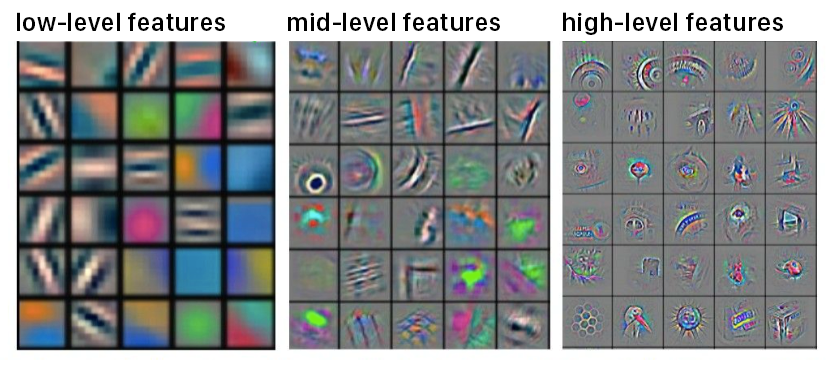

In [ ]:
Image("features.png")

- Convolutional layers are typically built up one after the other
- The idea is that features get *built up*, at low levels, you might
  have edge detectors, later layers use these edges to build up
  structure, and by high levels recognizable objects are being
  searched for
  - These images are made by doing reverse gradient descent on the
    network, i.e. updating the image pixels themselves, trying to make
    the image "light up" (set node output high) a particular node
- Networks these days can contain *hundreds* of these layers
  - This is the meaning of *deep* in deep learning
Image from https://twopointseven.github.io/2017-10-29/cnn/

# Strides and Padding

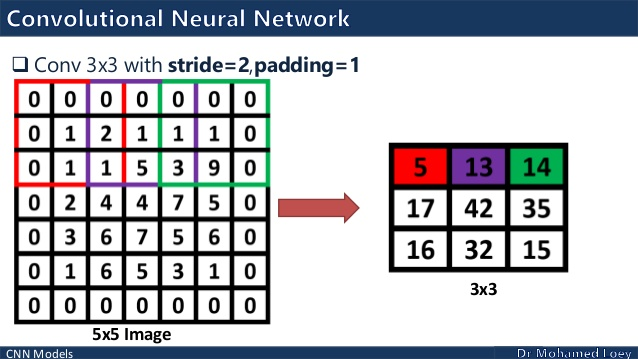

In [ ]:
Image("strides-padding.jpg")

- When sliding across the image, you can move the filter more than 1
  pixel at a time, this is the *stride*
  - By default its just 1, ie sliding the image
- The filter will reduce the size of the image (can only fit in so
  many 3x3 blocks), you can *pad* the image (with zeros, or copying
  the outer variables) to keep the outputs the same size
- Can also use different strides or pads in the vertical and
  horizontal directions

# Pooling Layers

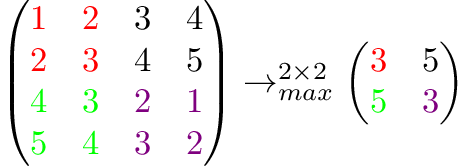

In [ ]:
import os
name='equation'; os.system(f'latexmk -pdf {name}.tex; latexmk -c; convert -density 250 {name}.pdf -quality 100 {name}.png');Image(f'{name}.png')

- We may want to reduce the size of the images flowing through the
  network for computational and conceptual efficiency reasons
  - As we add filters, we should be building up higher level features,
    which are less localized on the image
  - Another way to say this is we want to /downsample/ the image
- We can reduce the image through /pooling/, applying an operation on
  each $n \times n$ patch of the image (leaping *not* sliding)
- A typical use is max pooling, we could find the maximum of each
  patch of the image
- Here, we apply a $2 \times 2$ max pooling to reduce a $4 \times 4$
  matrix to $2 \times 2$
- Another typical operation is to take the /average/ of each patch

# Structuring a Network with Convolutional Layers

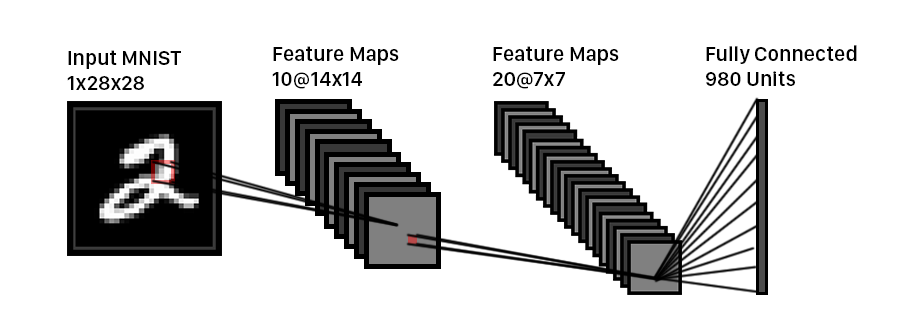

In [ ]:
Image("network.png")

- The basic CNN consists of several convolutional layers, followed by
  "squashing" the output of the last convolution into a regular 1d
  node structure, after which the fully connected layers of a normal
  NN can be used
- So the idea is, <font color="red">the convolutional layers search for particular high
  level "features", then the output is decided by which features do or
  do not exist in the network</font> <font color="green">"zoom out"</font>

Image from https://twopointseven.github.io/2017-10-29/cnn/

# Some Benefits of The Convolutional Neural Network

- Fewer parameters than a fully connected network
  - Parameters for a $c \times h \times w$ image fully connected to n nodes: $c \times h \times w \times n + n$
  - Parameters for a $c \times h \times w$ image convolutional to $n$ $m \times m$ filters (no padding/stride 1): $c \times m \times m \times n + n$
  - If our filter size is smaller than the image, much, much fewer
    parameters, and independent of input height, width
  - Fewer parameters is better for overtraining
- The sliding connections mean the network can learn features independent of position <font color="red">"more flexible than normal NN"</font>
  - A fully connected layer would need to learn what a 'hand' or an
    'eye' looks like independently everywhere it could be in the image
  - This *parameter sharing* between parts of the image means that the
    network can learn more robust features with less parameters
  - <font color="red">Normal NN have detectors certain place, but the detectors can move in CNN</font>
- We have developed a structure which could possibly be our "loop finder"

# Convolutional Filters in pytorch

- `torch.nn.Conv2d` provides a convolutional filter, you tell it:
  - The number of input channels
  - The number of output channels
  - The size of the filter (can be a number for $n \times n$ or a 2-tuple for nxm)
  - Optionally, you can change the stride and the padding
- The filters take in tensors of rank 4, with shape: `(number of
  images, number of channels, height of image, width of image)`
  (pytorch always assumes you're processing multiple images)
- The output is also a rank 4 tensor, with the number of output
  channels changed, and the height and width can be expanded or
  contracted by changing the stride and padding

In [ ]:
import torch
# convolutional filter from 1 -> 2 channels, with 3x3 filter
conv_filter = torch.nn.Conv2d(1,2,3)#, padding=(?,?))
print(conv_filter)
conv_filter(torch.tensor([ [ [[1,1,1],
                              [1,1,1],
                              [1,1,1.]] ] ]))

Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1))


tensor([[[[ 0.2531]],

         [[-0.1367]]]], grad_fn=<ThnnConv2DBackward>)

# Pooling Layers in pytorch

- Similar to Conv2d, there is `torch.nn.MaxPool2d` and `torch.nn.AvgPool2d` to max and average pooling respectively, 
- They only need to be given the filter size, and have similar
  input/output shapes (rank-4 tensors everywhere)

In [ ]:
pool = torch.nn.MaxPool2d(2)
pool(torch.tensor([ [ [[1,2,3,4],
                       [1,1,1,1],
                       [1,1,1.,1],
                       [4,5,6,7]] ] ]))

tensor([[[[2., 4.],
          [5., 7.]]]])

In [ ]:
pool = torch.nn.AvgPool2d(2)
pool(torch.tensor([ [ [[1,2,3,4],
                       [1,1,1,1],
                       [1,1,1.,1],
                       [4,5,6,7]] ] ]))

tensor([[[[1.2500, 2.2500],
          [2.7500, 3.7500]]]])

# Building a Network
- Networks will at some point need to go from processing 2d images
  with multiple channels, to a discrete probability distribution (if
  we are making a classifier)
- You can insert a `view` into the `forward` function to adjust the
  output nodes into a 1d line (-1 at the front so it automatically
  sizes to any number of images in the input)
- Here is a simple CNN for MNIST with 1 convolutional layer, which is
  reshaped and then connected to the 10 category output layer

In [ ]:
class SimpleCNN(torch.nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.conv = torch.nn.Conv2d(1,6,5) # 5x5 filter, no padding
    self.fc = torch.nn.Linear(6*24*24,10)
  def forward(self, x):
    x = torch.tanh(self.conv(x))
    x = self.fc(x.view(-1, 6*24*24))
    return x # crossentropy no softmax

In [ ]:
net = SimpleCNN()
print(sum(p.numel() for p in net.parameters()))
print(net)
print(list(p.numel() for p in net.parameters()))

34726
SimpleCNN(
  (conv): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (fc): Linear(in_features=3456, out_features=10, bias=True)
)
[150, 6, 34560, 10]


# Exercises <a id="exercises" />

Here is a square:

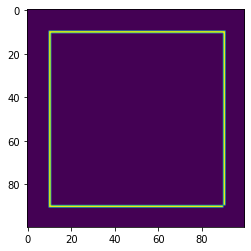

In [ ]:
import torch as th
import matplotlib.pyplot as plt

square = th.zeros((100,100))
square[10,10:90] = 1
square[90,10:90] = 1
square[10:90,10] = 1
square[10:90,90] = 1
plt.imshow(square)

We can create a `Conv2d` (turning off bias) and set the filter value ourself with a little effot, then see the output. (The filter weights are stored in the `Conv2d` object in the member `weights` which is a `Parameter` which holds the actual data in `data`) Here we have created a vertical line finder

In [ ]:
filter = th.tensor([[-1.,0,1],
                    [-1,0,1],
                    [-1,0,1]], requires_grad=True)
t = th.nn.Conv2d(1,1,3, bias=False)
t.weight.data = filter.unsqueeze(0).unsqueeze(0)
t.weight

Parameter containing:
tensor([[[[-1.,  0.,  1.],
          [-1.,  0.,  1.],
          [-1.,  0.,  1.]]]], requires_grad=True)

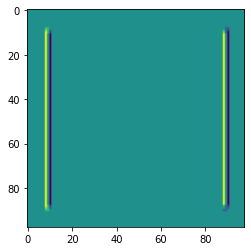

In [ ]:
plt.imshow(t(square.view(1,1,100,100)).view((98,98)).detach())

Take the code above and this time create a horizontal line filter. Check it works on the square image.

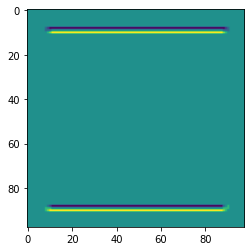

In [ ]:
filter = th.tensor([[1.,1,1],
                    [0,0,0],
                    [-1,-1,-1]], requires_grad=True)
t = th.nn.Conv2d(1,1,3, bias=False)
t.weight.data = filter.unsqueeze(0).unsqueeze(0)
t.weight
plt.imshow(t(square.view(1,1,100,100)).view((98,98)).detach())

## Training a convnet. 

Now, we will train a few convolutional networks in pytorch.

LeNet 5 was the first convolutional neural network, created all the
way back in the dark ages of 1998.  It was designed to perform
handwriting digit recognition for the US post office. MNIST was in
fact created to show that CNN were superior for this task.

The structure of LeNet-5 is shown below:

In [ ]:
import torch

class LeNet5(torch.nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()
    self.conv1 = torch.nn.Conv2d(1,6,5, padding=2)
    self.conv2 = torch.nn.Conv2d(6,16,5)
    self.conv3 = torch.nn.Conv2d(16,120,5)
    self.apool = torch.nn.AvgPool2d(2)
    self.fc1 = torch.nn.Linear(120,84)
    self.fc2 = torch.nn.Linear(84,10)
  def forward(self, x):
    x = torch.tanh(self.conv1(x))
    x = torch.tanh(self.apool(x))
    x = torch.tanh(self.conv2(x))
    x = torch.tanh(self.apool(x))
    x = torch.tanh(self.conv3(x))
    x = torch.flatten(x,1)
    x = torch.tanh(self.fc1(x))
    x = torch.tanh(self.fc2(x))
    return x # crossentropy no softmax

In [ ]:
Image("lenet5.png")

NameError: name 'Image' is not defined

This is interpreted as the input image starting at the bottom, and it
gets processed by the succsessive layers with the output of one layer
flowing to the next. Note that the diagram indicates whether the
conv2d layers are zero padded to keep the output the same size as the
input, and the number of output channels, and filter size are
indicated in the diagram. (Also, technically, LeNet-5 has some
slightly non-standard layer features that never caught / were never
found useful in the deep learning community, so this is a simplified
version). The activation functions after the layers are tanh, insert
an activation after the pooling and fully connected layers.

Here is the code to load MNIST (don't forget to change the directory!).

In [ ]:
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

trans = transforms.ToTensor()
train = torchvision.datasets.MNIST('.', train=True, download=True, transform=trans)
test = torchvision.datasets.MNIST('.', train=False, download=True, transform=trans)
trainloader = torch.utils.data.DataLoader(train, batch_size=64)
testloader = torch.utils.data.DataLoader(test, batch_size=64)

Based on the structure given above, create LeNet-5 in pytorch, and
train it on the MNIST dataset. The usual cross-entropy loss can be
used (convolutional filters can be backpropagated through, as a fully
connected layer can) and the usual optimizers we've seen in previous
weeks are also usable with CNNs with no new surprises. What is the
best loss/accuracy you can achieve?  ([LeCun was able to get to 99%](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)
using some tricks we'll see later in the course.)

Keep track of the test/train curve (sample several times an epoch),
and check for overtraining, and show the accuracy of your best
model.

If training is taking to long, check you're running on the GPU (!).

(image num 0) label :5
(image num 1) label :0
(image num 2) label :4
(image num 3) label :1
(image num 4) label :9
(image num 5) label :2
(image num 6) label :1
(image num 7) label :3
(image num 8) label :1
(image num 9) label :4


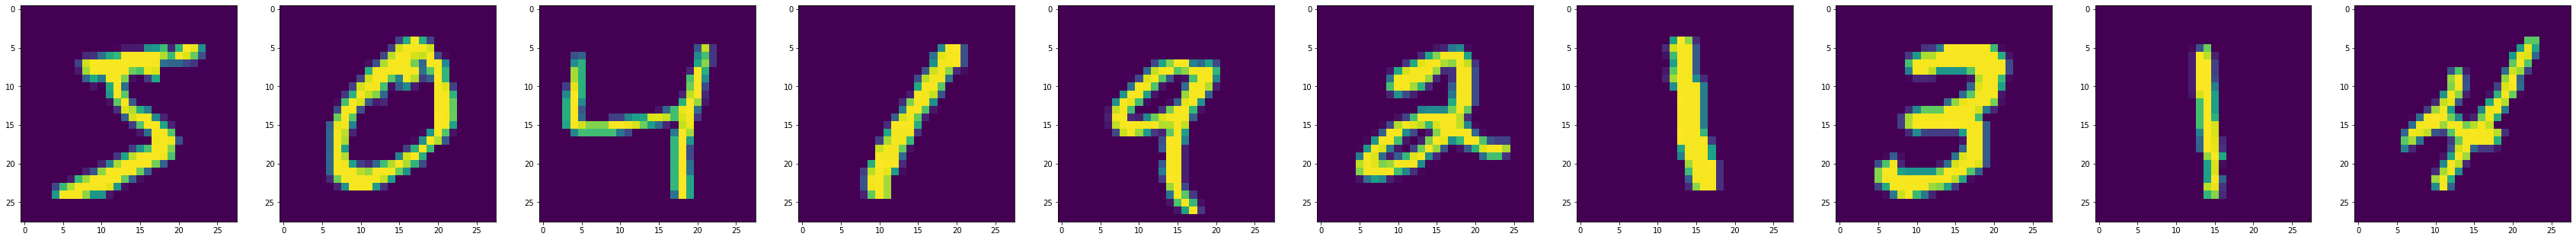

In [ ]:
import matplotlib.pyplot as plt

x,y = next(iter(trainloader))

n = 10

plt.figure(figsize=(60,60))
for i in range(n):
    print(f'(image num {i}) label :{y[i].item()}')
    plt.subplot(1,n,i+1)
    plt.imshow(x[i,0,:,:])

In [ ]:
from collections import defaultdict

net1 = LeNet5()
opt = torch.optim.Adam(net1.parameters(), lr=1e-3)
los = torch.nn.CrossEntropyLoss()

tr_loss = []
te_loss = []
tr_acc = []
te_acc = []

for e in range(1,11):
    eloss = defaultdict(lambda: [])
    
    for x, y in trainloader:
        opt.zero_grad()
        p = net1(x)
        loss = los(p, y)
        loss.backward()
        opt.step()
        # keep track of some summary statistics
        eloss['loss'].append(loss.item())
        eloss['n'].append(x.size(0))
        eloss['corr'].append(sum(p.max(axis=1)[1] == y))
    tr_loss.append(sum(eloss["loss"])/sum(eloss["n"]))
    tr_acc.append(sum(eloss["corr"])/sum(eloss["n"]))
    print(f'(train) epoch {e:3d} avg loss; {sum(eloss["loss"])/sum(eloss["n"]):.4f}')
    print(f'                  acc.;     {sum(eloss["corr"])/sum(eloss["n"]):.4f}')
    
    eloss = defaultdict(lambda: [])
    for x, y in testloader:
        p = net1(x)
        loss = los(p, y)
        # keep track of some summary statistics
        eloss['loss'].append(loss.item())
        eloss['n'].append(x.size(0))
        eloss['corr'].append(sum(p.max(axis=1)[1] == y))
    te_loss.append(sum(eloss["loss"])/sum(eloss["n"]))
    te_acc.append(sum(eloss["corr"])/sum(eloss["n"]))
    print(f'(test)  epoch {e:3d} avg loss; {sum(eloss["loss"])/sum(eloss["n"]):.4f}')
    print(f'                  acc.;     {sum(eloss["corr"])/sum(eloss["n"]):.4f}')
        
print("done")

print('final train loss =',tr_loss[-1])
print('final test loss =',te_loss[-1])
print('final train accuracy =',tr_acc[-1].item())
print('final test accuracy =',te_acc[-1].item())
'''
final train loss = 0.012591856029629707
final test loss = 0.012630100858211517
final train accuracy = 0.9955000281333923
final test accuracy = 0.9942142963409424
'''

(train) epoch   1 avg loss; 0.0157
                  acc.;     0.9019
(test)  epoch   1 avg loss; 0.0138
                  acc.;     0.9558
(train) epoch   2 avg loss; 0.0135
                  acc.;     0.9630
(test)  epoch   2 avg loss; 0.0133
                  acc.;     0.9696
(train) epoch   3 avg loss; 0.0131
                  acc.;     0.9758
(test)  epoch   3 avg loss; 0.0131
                  acc.;     0.9787
(train) epoch   4 avg loss; 0.0130
                  acc.;     0.9816
(test)  epoch   4 avg loss; 0.0130
                  acc.;     0.9817
(train) epoch   5 avg loss; 0.0129
                  acc.;     0.9851
(test)  epoch   5 avg loss; 0.0130
                  acc.;     0.9825
(train) epoch   6 avg loss; 0.0128
                  acc.;     0.9876
(test)  epoch   6 avg loss; 0.0129
                  acc.;     0.9848
(train) epoch   7 avg loss; 0.0128
                  acc.;     0.9891
(test)  epoch   7 avg loss; 0.0129
                  acc.;     0.9854
(train) epoch   8 av

'\nfinal train loss = 0.012591856029629707\nfinal test loss = 0.012630100858211517\nfinal train accuracy = 0.9955000281333923\nfinal test accuracy = 0.9942142963409424\n'

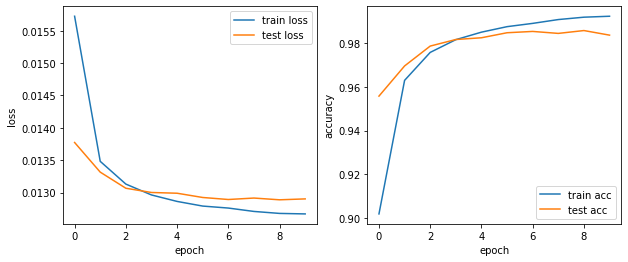

In [ ]:
# plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(tr_loss, label='train loss')
plt.plot(te_loss, label='test loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(tr_acc, label='train acc')
plt.plot(te_acc, label='test acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

Similar to MNIST above, `torchvision.datasets.FashionMNIST` can
download the Fashion-MNIST, which is a more difficult version of
MNIST. Instead of handwritten numbers, you have black and white images
of various items of clothing, which you should train a classifier to
distinguish, as we saw last week.

Copying the MNIST download cell above, download the fashion MNIST
data.

In [ ]:
trans = transforms.ToTensor()
train = torchvision.datasets.FashionMNIST('.', train=True, download=True, transform=trans)
test = torchvision.datasets.FashionMNIST('.', train=False, download=True, transform=trans)
trainloader = torch.utils.data.DataLoader(train, batch_size=64)
testloader = torch.utils.data.DataLoader(test, batch_size=64)

In [ ]:
from collections import defaultdict

net2 = LeNet5()
opt = torch.optim.Adam(net2.parameters(), lr=1e-3)
los = torch.nn.CrossEntropyLoss()

tr_loss = []
te_loss = []
tr_acc = []
te_acc = []

for e in range(1,11):
    eloss = defaultdict(lambda: [])
    
    for x, y in trainloader:
        opt.zero_grad()
        p = net2(x)
        loss = los(p, y)
        loss.backward()
        opt.step()
        # keep track of some summary statistics
        eloss['loss'].append(loss.item())
        eloss['n'].append(x.size(0))
        eloss['corr'].append(sum(p.max(axis=1)[1] == y))
    tr_loss.append(sum(eloss["loss"])/sum(eloss["n"]))
    tr_acc.append(sum(eloss["corr"])/sum(eloss["n"]))
    print(f'(train) epoch {e:3d} avg loss; {sum(eloss["loss"])/sum(eloss["n"]):.4f}')
    print(f'                  acc.;     {sum(eloss["corr"])/sum(eloss["n"]):.4f}')

    eloss = defaultdict(lambda: [])
    for x, y in testloader:
        p = net2(x)
        loss = los(p, y)
        # keep track of some summary statistics
        eloss['loss'].append(loss.item())
        eloss['n'].append(x.size(0))
        eloss['corr'].append(sum(p.max(axis=1)[1] == y))
    te_loss.append(sum(eloss["loss"])/sum(eloss["n"]))
    te_acc.append(sum(eloss["corr"])/sum(eloss["n"]))
    print(f'(test)  epoch {e:3d} avg loss; {sum(eloss["loss"])/sum(eloss["n"]):.4f}')
    print(f'                  acc.;     {sum(eloss["corr"])/sum(eloss["n"]):.4f}')
        
print("done")

print('fianl train loss =',tr_loss[-1])
print('fianl test loss =',te_loss[-1])
print('final train accuracy =',tr_acc[-1].item())
print('final test accuracy =',te_acc[-1].item())

(train) epoch   1 avg loss; 0.0187
                  acc.;     0.6683
(test)  epoch   1 avg loss; 0.0174
                  acc.;     0.7535
(train) epoch   2 avg loss; 0.0163
                  acc.;     0.8192
(test)  epoch   2 avg loss; 0.0161
                  acc.;     0.8379
(train) epoch   3 avg loss; 0.0156
                  acc.;     0.8532
(test)  epoch   3 avg loss; 0.0157
                  acc.;     0.8521
(train) epoch   4 avg loss; 0.0153
                  acc.;     0.8631
(test)  epoch   4 avg loss; 0.0156
                  acc.;     0.8569
(train) epoch   5 avg loss; 0.0152
                  acc.;     0.8687
(test)  epoch   5 avg loss; 0.0155
                  acc.;     0.8577
(train) epoch   6 avg loss; 0.0150
                  acc.;     0.8737
(test)  epoch   6 avg loss; 0.0154
                  acc.;     0.8607
(train) epoch   7 avg loss; 0.0149
                  acc.;     0.8775
(test)  epoch   7 avg loss; 0.0153
                  acc.;     0.8637
(train) epoch   8 av

'\nfianl train loss = 0.014340771491328876\nfianl test loss = 0.014443447809559959\nfinal train accuracy = 0.9056500196456909\nfinal test accuracy = 0.902985692024231\n'

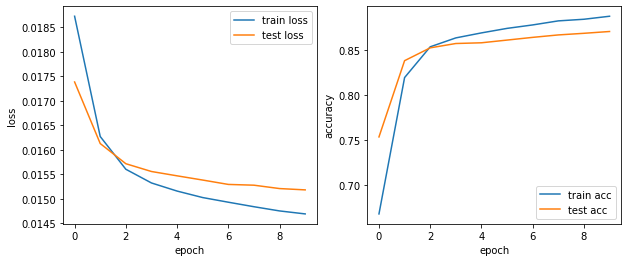

In [ ]:
# plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(tr_loss, label='train loss')
plt.plot(te_loss, label='test loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(tr_acc, label='train acc')
plt.plot(te_acc, label='test acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

Write and train a network to distinguish clothing categories from the
Fashion MNIST data. Try to get the best accuracy on the test set you
can. Since we have more compute power than LeCun could have dreamed of
in the 90s (GPUs weren't really feasible to train on until 2012), you
can expand and adapt the LeNet-5 network as you like. You can <font color="blue">add more
convolutional filters, and change the filter sizes, increase or
decrease the hidden layers, try different activation functions, and so
on.</font> As you make changes, run and see how the training time and overall
accuracy changes. Train and compare at least 2 networks, one `SmallNet` like LeNet-5 and one `LargeNet` which should <font color="blue">contain more layers, with more filters per layer.</font> Check the accuracy on the `test` set after training. Does it match the `train` accuracy?

Train SmallNet

In [ ]:
class SmallLeNet5(torch.nn.Module):
  def __init__(self):
    super(SmallLeNet5, self).__init__()
    self.conv1 = torch.nn.Conv2d(1,3,3, padding=1)
    self.conv2 = torch.nn.Conv2d(3,60,14)
    self.mpool = torch.nn.MaxPool2d(2)
    self.fc1 = torch.nn.Linear(60,10)
  def forward(self, x):
    x = torch.relu(self.conv1(x)) # 28x28x6
    x = torch.relu(self.mpool(x)) # 14x14x6
    x = torch.relu(self.conv2(x)) # 1x1x60
    x = torch.flatten(x,1)        # 60
    x = torch.tanh(self.fc1(x))   # 10
    return x # crossentropy no softmax

In [ ]:
from collections import defaultdict
import time

net3 = SmallLeNet5()
opt = th.optim.Adam(net3.parameters(), lr=1e-3)
los = th.nn.CrossEntropyLoss()

tr_loss = []
tr_acc = []

start = time.time()

for e in range(1,11):
    eloss = defaultdict(lambda: [])
    
    for x, y in trainloader:
        opt.zero_grad()
        p = net3(x)
        loss = los(p, y)
        loss.backward()
        opt.step()
        # keep track of some summary statistics
        eloss['loss'].append(loss.item())
        eloss['n'].append(x.size(0))
        eloss['corr'].append(sum(p.max(axis=1)[1] == y))
    tr_loss.append(sum(eloss["loss"])/sum(eloss["n"]))
    tr_acc.append(sum(eloss["corr"])/sum(eloss["n"]))
    print(f'(train) epoch {e:3d} avg loss; {sum(eloss["loss"])/sum(eloss["n"]):.4f}')
    print(f'                  acc.;     {sum(eloss["corr"])/sum(eloss["n"]):.4f}')
    
print("time :", time.time() - start)
    
print("done")

print('final train loss =',tr_loss[-1])
print('final train accuracy =',tr_acc[-1].item())

(train) epoch   1 avg loss; 0.0196
                  acc.;     0.6454
(train) epoch   2 avg loss; 0.0174
                  acc.;     0.7437
(train) epoch   3 avg loss; 0.0167
                  acc.;     0.8012
(train) epoch   4 avg loss; 0.0163
                  acc.;     0.8229
(train) epoch   5 avg loss; 0.0161
                  acc.;     0.8321
(train) epoch   6 avg loss; 0.0160
                  acc.;     0.8359
(train) epoch   7 avg loss; 0.0159
                  acc.;     0.8410
(train) epoch   8 avg loss; 0.0158
                  acc.;     0.8426
(train) epoch   9 avg loss; 0.0158
                  acc.;     0.8474
(train) epoch  10 avg loss; 0.0157
                  acc.;     0.8467
time : 113.62451028823853
done
final train loss = 0.015716768012444177
final train accuracy = 0.846666693687439


Train LargeNet

In [ ]:
class LargeLeNet5(torch.nn.Module):
  def __init__(self):
    super(LargeLeNet5, self).__init__()
    self.conv1 = torch.nn.Conv2d(1,6,7, padding=3)
    self.conv2 = torch.nn.Conv2d(6,16,3)
    self.conv3 = torch.nn.Conv2d(16,120,3)
    self.conv4 = torch.nn.Conv2d(120,600,2)
    self.mpool = torch.nn.MaxPool2d(2)
    self.fc1 = torch.nn.Linear(600,120)
    self.fc2 = torch.nn.Linear(120,84)
    self.fc3 = torch.nn.Linear(84,10)
  def forward(self, x):
    x = torch.relu(self.conv1(x)) # 28x28x6
    x = torch.relu(self.mpool(x)) # 14x14x6
    x = torch.relu(self.conv2(x)) # 12x12x16
    x = torch.relu(self.mpool(x)) # 6x6x16
    x = torch.relu(self.conv3(x)) # 4x4x120
    x = torch.relu(self.mpool(x)) # 2x2x120
    x = torch.relu(self.conv4(x)) # 1x1x600
    x = torch.flatten(x,1)        # 600
    x = torch.tanh(self.fc1(x))   # 120
    x = torch.tanh(self.fc2(x))   # 84
    x = torch.tanh(self.fc3(x))   # 10
    return x # crossentropy no softmax

In [ ]:
from collections import defaultdict

net4 = LargeLeNet5()
opt = th.optim.Adam(net4.parameters(), lr=1e-3)
los = th.nn.CrossEntropyLoss()

tr_loss = []
tr_acc = []

start = time.time()

for e in range(1,11):
    eloss = defaultdict(lambda: [])
    
    for x, y in trainloader:
        opt.zero_grad()
        p = net4(x)
        loss = los(p, y)
        loss.backward()
        opt.step()
        # keep track of some summary statistics
        eloss['loss'].append(loss.item())
        eloss['n'].append(x.size(0))
        eloss['corr'].append(sum(p.max(axis=1)[1] == y))
    tr_loss.append(sum(eloss["loss"])/sum(eloss["n"]))
    tr_acc.append(sum(eloss["corr"])/sum(eloss["n"]))
    print(f'(train) epoch {e:3d} avg loss; {sum(eloss["loss"])/sum(eloss["n"]):.4f}')
    print(f'                  acc.;     {sum(eloss["corr"])/sum(eloss["n"]):.4f}')
    
print("time :", time.time() - start)
    
print("done")

print('final train loss =',tr_loss[-1])
print('final train accuracy =',tr_acc[-1].item())

(train) epoch   1 avg loss; 0.0198
                  acc.;     0.5582
(train) epoch   2 avg loss; 0.0170
                  acc.;     0.7080
(train) epoch   3 avg loss; 0.0162
                  acc.;     0.8023
(train) epoch   4 avg loss; 0.0155
                  acc.;     0.8619
(train) epoch   5 avg loss; 0.0151
                  acc.;     0.8755
(train) epoch   6 avg loss; 0.0149
                  acc.;     0.8843
(train) epoch   7 avg loss; 0.0148
                  acc.;     0.8901
(train) epoch   8 avg loss; 0.0147
                  acc.;     0.8937
(train) epoch   9 avg loss; 0.0146
                  acc.;     0.8969
(train) epoch  10 avg loss; 0.0146
                  acc.;     0.8984
time : 236.15768480300903
done
final train loss = 0.01459460027217865
final train accuracy = 0.8984000086784363


Compare LargeNet and SmallNet on the test set

In [ ]:
from collections import defaultdict

small_te_loss = []
small_te_acc = []
large_te_loss = []
large_te_acc = []

for e in range(1,11):
    small_eloss = defaultdict(lambda: [])
    large_eloss = defaultdict(lambda: [])
    
    for x, y in testloader:
        p = net3(x)
        loss = los(p, y)
        # keep track of some summary statistics
        small_eloss['loss'].append(loss.item())
        small_eloss['n'].append(x.size(0))
        small_eloss['corr'].append(sum(p.max(axis=1)[1] == y))
        p = net4(x)
        loss = los(p, y)
        # keep track of some summary statistics
        large_eloss['loss'].append(loss.item())
        large_eloss['n'].append(x.size(0))
        large_eloss['corr'].append(sum(p.max(axis=1)[1] == y))
    small_te_loss.append(sum(small_eloss["loss"])/sum(small_eloss["n"]))
    small_te_acc.append(sum(small_eloss["corr"])/sum(small_eloss["n"]))
    print(f'small (test)  epoch {e:3d} avg loss; {sum(small_eloss["loss"])/sum(small_eloss["n"]):.4f}')
    print(f'                        acc.;     {sum(small_eloss["corr"])/sum(small_eloss["n"]):.4f}')
    large_te_loss.append(sum(large_eloss["loss"])/sum(large_eloss["n"]))
    large_te_acc.append(sum(large_eloss["corr"])/sum(large_eloss["n"]))
    print(f'large (test)  epoch {e:3d} avg loss; {sum(large_eloss["loss"])/sum(large_eloss["n"]):.4f}')
    print(f'                        acc.;     {sum(large_eloss["corr"])/sum(large_eloss["n"]):.4f}')
        
print("done")

print('small final test loss =',small_te_loss[-1])
print('small final test accuracy =',small_te_acc[-1].item())
print('large final test loss =',large_te_loss[-1])
print('large final test accuracy =',large_te_acc[-1].item())

small (test)  epoch   1 avg loss; 0.0161
                        acc.;     0.8415
large (test)  epoch   1 avg loss; 0.0150
                        acc.;     0.8875
small (test)  epoch   2 avg loss; 0.0161
                        acc.;     0.8415
large (test)  epoch   2 avg loss; 0.0150
                        acc.;     0.8875
small (test)  epoch   3 avg loss; 0.0161
                        acc.;     0.8415
large (test)  epoch   3 avg loss; 0.0150
                        acc.;     0.8875
small (test)  epoch   4 avg loss; 0.0161
                        acc.;     0.8415
large (test)  epoch   4 avg loss; 0.0150
                        acc.;     0.8875
small (test)  epoch   5 avg loss; 0.0161
                        acc.;     0.8415
large (test)  epoch   5 avg loss; 0.0150
                        acc.;     0.8875
small (test)  epoch   6 avg loss; 0.0161
                        acc.;     0.8415
large (test)  epoch   6 avg loss; 0.0150
                        acc.;     0.8875
small (test)  ep

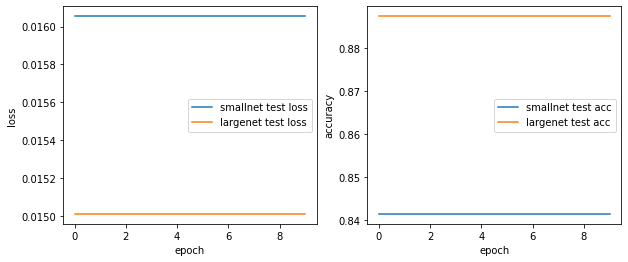

In [ ]:
# plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(small_te_loss, label='smallnet test loss')
plt.plot(large_te_loss, label='largenet test loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(small_te_acc, label='smallnet test acc')
plt.plot(large_te_acc, label='largenet test acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()